Randomized Searching
======================

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split


iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [2]:
from sklearn.grid_search import RandomizedSearchCV

In [3]:
from scipy.stats import expon

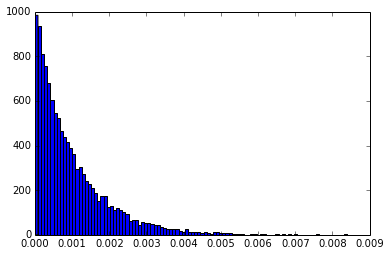

In [4]:
plt.hist([expon.rvs(scale=0.001) for x in xrange(10000)], bins=100, normed=True);

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler



param_distributions = {'C': expon(), 'gamma': expon()}
rs = RandomizedSearchCV(SVC(), param_distributions=param_distributions, n_iter=50)

In [6]:
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          fit_params={}, iid=True, n_iter=50, n_jobs=1,
          param_distributions={'C': <scipy.stats.distributions.rv_frozen object at 0x7f150dfc7510>, 'gamma': <scipy.stats.distributions.rv_frozen object at 0x7f150df92c10>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring=None, verbose=0)

In [7]:
rs.best_params_

{'C': 1.6214755609400757, 'gamma': 0.24979204736154573}

In [8]:
rs.best_score_

0.9732142857142857

In [10]:
scores, Cs, gammas = zip(*[(score.mean_validation_score, score.parameters['C'], score.parameters['gamma']) for score in rs.grid_scores_])

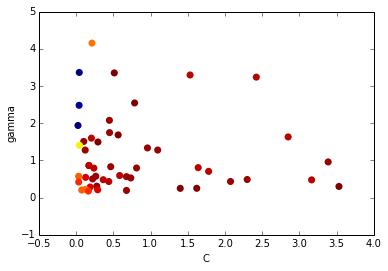

In [11]:
plt.scatter(Cs, gammas, s=50, c=scores, linewidths=0)
plt.xlabel("C")
plt.ylabel("gamma")

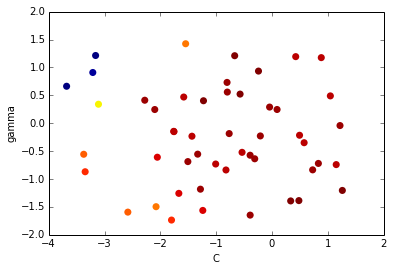

In [12]:
plt.scatter(np.log(Cs), np.log(gammas), s=50, c=scores, linewidths=0)
plt.xlabel("C")
plt.ylabel("gamma")